code snippet to generate a synthetic DataFrame that includes features allowing you to practice various data preprocessing techniques like missing value removal, handling class imbalance, handling outliers, label encoding, and one-hot encoding


In [1]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generating synthetic data
data = {
    'ID': range(1, 101),  # Unique IDs
    'Category': np.random.choice(['A', 'B', 'C'], size=100),  # Categorical data for label encoding
    'Score': np.random.normal(50, 10, 100),  # Continuous data for outliers
    'Gender': np.random.choice(['Male', 'Female'], size=100),  # Categorical data for one-hot encoding
    'Age': np.random.randint(18, 60, 100),  # Continuous data
    'Income': np.random.normal(60000, 15000, 100),  # Continuous data with potential outliers
    'Class': np.random.choice([0, 1], size=100, p=[0.9, 0.1]),  # Imbalanced binary class for classification
}

df = pd.DataFrame(data)

# Introduce missing values
df.loc[np.random.choice(df.index, size=10, replace=False), 'Score'] = np.nan
df.loc[np.random.choice(df.index, size=5, replace=False), 'Income'] = np.nan
df.loc[np.random.choice(df.index, size=7, replace=False), 'Gender'] = np.nan

# Introduce outliers
df.loc[np.random.choice(df.index, size=3, replace=False), 'Income'] = df['Income'].mean() + 3 * df['Income'].std()
df.loc[np.random.choice(df.index, size=2, replace=False), 'Score'] = df['Score'].mean() + 3 * df['Score'].std()




In [2]:
##Display the Dataframe
df.head()

,ID,Category,Score,Gender,Age,Income,Class
0,1,C,55.821228,Female,34,92019.618720,0
1,2,A,58.877485,Male,45,63402.732330,0
2,3,C,58.943323,Female,47,84831.924381,0
3,4,C,57.549978,Female,46,53056.118669,0
4,5,A,47.928341,Female,23,61298.487218,0


In [4]:
df.describe()

,ID,Score,Age,Income,Class
count,100.000000,90.000000,100.000000,95.000000,100.000000
mean,50.500000,52.002368,40.390000,62731.720097,0.100000
std,29.011492,10.417239,12.051988,19597.287692,0.301511
min,1.000000,23.448240,18.000000,9538.567103,0.000000
25%,25.750000,45.812805,32.000000,50855.841485,0.000000
50%,50.500000,51.389505,42.000000,61553.521267,0.000000
75%,75.250000,58.249954,50.000000,75124.022530,0.000000
max,100.000000,83.722963,59.000000,113411.735915,1.000000


1.Missing Value Handling

In [6]:
##Checking for Missing Values 
import seaborn as sns

<AxesSubplot: >

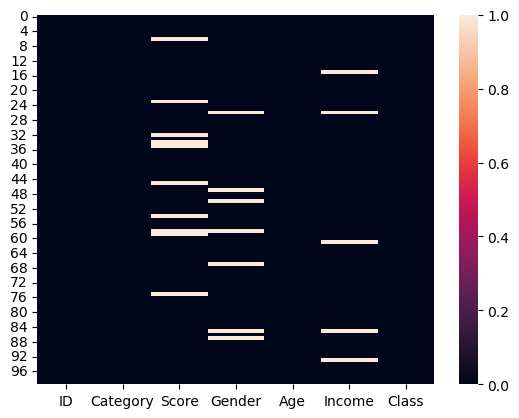

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

ID           0
Category     0
Score       10
Gender       7
Age          0
Income       5
Class        0
dtype: int64

/tmp/ipykernel_77/2495946040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Score'])


<AxesSubplot: xlabel='Score', ylabel='Density'>

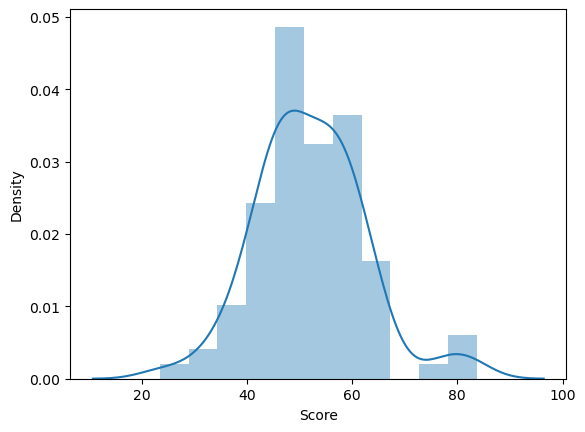

In [9]:
sns.distplot(df['Score'])

In [12]:
df['Score'].mean() ## Checking the mean

52.00236770085192

In [13]:
df['Score'].median()

51.389504882522495

In [15]:
##Imputing the mean into a new column 
df['Score_mean']=df['Score'].fillna(df['Score'].median())

In [16]:
##Performing the same for Income 
df['Income_mean']=df['Income'].fillna(df['Income'].median())

In [20]:
##Performing the same for gender using mode 
df['Gender_mode']=df['Gender'].fillna(df['Gender'].mode())

In [18]:
##View the new DF
df.head()

,ID,Category,Score,Gender,Age,Income,Class,Score_mean,Income_mean
0,1,C,55.821228,Female,34,92019.618720,0,55.821228,92019.618720
1,2,A,58.877485,Male,45,63402.732330,0,58.877485,63402.732330
2,3,C,58.943323,Female,47,84831.924381,0,58.943323,84831.924381
3,4,C,57.549978,Female,46,53056.118669,0,57.549978,53056.118669
4,5,A,47.928341,Female,23,61298.487218,0,47.928341,61298.487218


Removing Outliers

In [22]:
##Creating a new df with only the needed values

df_1=df[['ID','Category','Score_mean','Gender_mode','Age','Class','Income_mean']]

In [23]:
df_1

,ID,Category,Score_mean,Gender_mode,Age,Class,Income_mean
0,1,C,55.821228,Female,34,0,92019.618720
1,2,A,58.877485,Male,45,0,63402.732330
2,3,C,58.943323,Female,47,0,84831.924381
3,4,C,57.549978,Female,46,0,53056.118669
4,5,A,47.928341,Female,23,0,61298.487218
...,...,...,...,...,...,...,...
95,96,A,55.561218,Female,49,0,113411.735915
96,97,A,60.438606,Male,42,0,57542.021048
97,98,C,55.264482,Female,57,0,87911.670812
98,99,A,63.638865,Male,18,0,82173.781722


<AxesSubplot: >

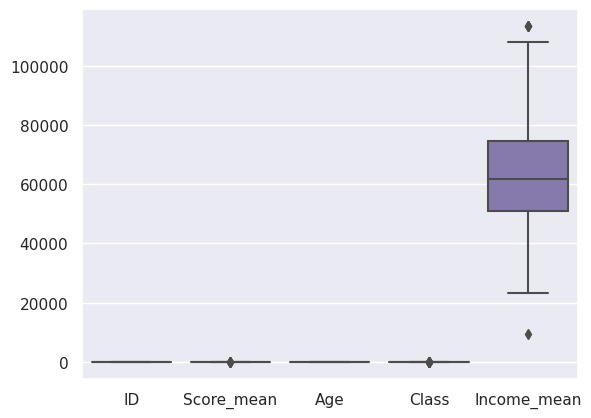

In [29]:
##Checking for outlier
sns.set_theme()
sns.boxplot(df_1)

In [36]:
##Income_mean has outliers

##Calculating the Q1 and Q3
Q1=df_1['Income_mean'].quantile(.25)
Q3=df_1['Income_mean'].quantile(.75)
## Calculating th IQR
IQR=Q3-Q1
## Calculating Upper Bound and Lower Bound
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR


In [46]:
upper_bound


109982.78076925082

In [49]:
##Creating a df without Outliers
df_clean=df_1[(df_1['Income_mean']>=lower_bound) & (df_1['Income_mean']<=upper_bound)]


In [50]:
df_clean.head()

,ID,Category,Score_mean,Gender_mode,Age,Class,Income_mean
0,1,C,55.821228,Female,34,0,92019.618720
1,2,A,58.877485,Male,45,0,63402.732330
2,3,C,58.943323,Female,47,0,84831.924381
3,4,C,57.549978,Female,46,0,53056.118669
4,5,A,47.928341,Female,23,0,61298.487218


<AxesSubplot: >

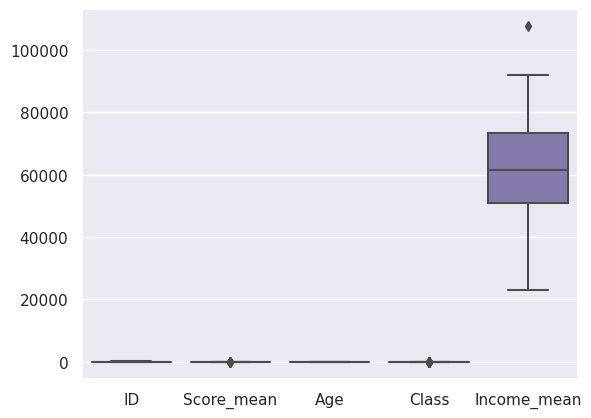

In [51]:
##Checking if outliers still exist
sns.boxplot(df_clean)

In [58]:
##Habdling Imbalance
from sklearn.utils import resample

In [53]:
scaler=StandardScaler()

In [55]:
df['Class'].value_counts() ##Imbalance in 1s

0    90
1    10
Name: Class, dtype: int64

In [60]:
df_min=df[df['Class']==1]

In [61]:
df_max=df[df['Class']==0]

In [66]:
df_upsampled=resample(df_min,replace=True,n_samples=len(df_max),random_state=42)

In [70]:
df_balanced=pd.concat([df_upsampled,df_max])

In [71]:
df_balanced

,ID,Category,Score,Gender,Age,Income,Class,Score_mean,Income_mean,Gender_mode
55,56,C,64.039587,Female,45,37088.210612,1,64.039587,37088.210612,Female
30,31,B,79.946209,Female,59,42825.772199,1,79.946209,42825.772199,Female
58,59,C,NaN,NaN,49,71467.173530,1,51.389505,71467.173530,NaN
34,35,C,NaN,Female,57,113411.735915,1,51.389505,113411.735915,Female
55,56,C,64.039587,Female,45,37088.210612,1,64.039587,37088.210612,Female
...,...,...,...,...,...,...,...,...,...,...
95,96,A,55.561218,Female,49,113411.735915,0,55.561218,113411.735915,Female
96,97,A,60.438606,Male,42,57542.021048,0,60.438606,57542.021048,Male
97,98,C,55.264482,Female,57,87911.670812,0,55.264482,87911.670812,Female
98,99,A,63.638865,Male,18,82173.781722,0,63.638865,82173.781722,Male


In [72]:
##Standerization of Dataset
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()

In [81]:
##List of all the Catagorical Variable
cat_list=[features for features in df_balanced.columns if df_balanced[features].dtype=='O']

In [79]:
df_cat

['Category', 'Gender', 'Gender_mode']

In [82]:
##List of all the Numerical Variable
num_list=[features for features in df_balanced.columns if df_balanced[features].dtype!='O']

In [84]:
num_list

['ID', 'Score', 'Age', 'Income', 'Class', 'Score_mean', 'Income_mean']

In [87]:
df_num=df_balanced[num_list] ## A dataframe for Numerical Values

In [88]:
df_num

,ID,Score,Age,Income,Class,Score_mean,Income_mean
55,56,64.039587,45,37088.210612,1,64.039587,37088.210612
30,31,79.946209,59,42825.772199,1,79.946209,42825.772199
58,59,NaN,49,71467.173530,1,51.389505,71467.173530
34,35,NaN,57,113411.735915,1,51.389505,113411.735915
55,56,64.039587,45,37088.210612,1,64.039587,37088.210612
...,...,...,...,...,...,...,...
95,96,55.561218,49,113411.735915,0,55.561218,113411.735915
96,97,60.438606,42,57542.021048,0,60.438606,57542.021048
97,98,55.264482,57,87911.670812,0,55.264482,87911.670812
98,99,63.638865,18,82173.781722,0,63.638865,82173.781722


In [89]:
df_cat=df_balanced[cat_list] ## A dataframe for catagorical Values

In [90]:
scaler.fit(df_num)

StandardScaler()

In [92]:
scaled_df_num=scaler.transform(df_num)

In [94]:
Scaled_df=pd.DataFrame(data=scaled_df_num,columns=num_list)

In [95]:
Scaled_df

,ID,Score,Age,Income,Class,Score_mean,Income_mean
0,0.303023,0.898503,0.162789,-1.374376,1.0,1.075070,-1.389203
1,-0.680818,2.254826,1.265550,-1.087293,1.0,2.623751,-1.098140
2,0.421084,NaN,0.477863,0.345796,1.0,-0.156552,0.354822
3,-0.523403,NaN,1.108012,2.444517,1.0,-0.156552,2.482647
4,0.303023,0.898503,0.162789,-1.374376,1.0,1.075070,-1.389203
...,...,...,...,...,...,...,...
175,1.877169,0.175572,0.477863,2.444517,-1.0,0.249609,2.482647
176,1.916523,0.591456,-0.073517,-0.350957,-1.0,0.724475,-0.351593
177,1.955876,0.150270,1.108012,1.168606,-1.0,0.220718,1.189043
178,1.995230,0.864335,-1.963965,0.881507,-1.0,1.036055,0.897963


In [96]:
##Concatanating with the catagorical df
Df_Bal_nm_scaled=pd.concat([Scaled_df,df_cat])

In [97]:
Df_Bal_nm_scaled ##This is tha Balanced, Standarised, and Missing Values and Outliers Removed Dataset

,ID,Score,Age,Income,Class,Score_mean,Income_mean,Category,Gender,Gender_mode
0,0.303023,0.898503,0.162789,-1.374376,1.0,1.075070,-1.389203,NaN,NaN,NaN
1,-0.680818,2.254826,1.265550,-1.087293,1.0,2.623751,-1.098140,NaN,NaN,NaN
2,0.421084,NaN,0.477863,0.345796,1.0,-0.156552,0.354822,NaN,NaN,NaN
3,-0.523403,NaN,1.108012,2.444517,1.0,-0.156552,2.482647,NaN,NaN,NaN
4,0.303023,0.898503,0.162789,-1.374376,1.0,1.075070,-1.389203,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Female,Female
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Male,Male
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,Female,Female
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Male,Male


Feature Encoding

In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [100]:
Df_Bal_nm_scaled.isnull().sum()

ID             180
Score          223
Age            180
Income         185
Class          180
Score_mean     180
Income_mean    180
Category       180
Gender         200
Gender_mode    200
dtype: int64

In [101]:
encoder=LabelEncoder()

In [103]:
encoder.fit(Df_Bal_nm_scaled['Gender_mode'])

LabelEncoder()

In [104]:
gender_encoded=encoder.transform(Df_Bal_nm_scaled['Gender_mode'])

In [106]:
Df_Bal_nm_scaled['Gender Encoded']=gender_encoded

In [107]:
Df_Bal_nm_scaled

,ID,Score,Age,Income,Class,Score_mean,Income_mean,Category,Gender,Gender_mode,Gender Encoded
0,0.303023,0.898503,0.162789,-1.374376,1.0,1.075070,-1.389203,NaN,NaN,NaN,2
1,-0.680818,2.254826,1.265550,-1.087293,1.0,2.623751,-1.098140,NaN,NaN,NaN,2
2,0.421084,NaN,0.477863,0.345796,1.0,-0.156552,0.354822,NaN,NaN,NaN,2
3,-0.523403,NaN,1.108012,2.444517,1.0,-0.156552,2.482647,NaN,NaN,NaN,2
4,0.303023,0.898503,0.162789,-1.374376,1.0,1.075070,-1.389203,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Female,Female,0
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Male,Male,1
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,Female,Female,0
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Male,Male,1


In [112]:
ohe=OneHotEncoder()

In [116]:
Df_Bal_nm_scaled['Category'].value_counts()

B    79
C    68
A    33
Name: Category, dtype: int64

In [120]:
ohe.fit(Df_Bal_nm_scaled[['Category']])

OneHotEncoder()

In [125]:
ohencoded=ohe.transform(Df_Bal_nm_scaled[['Category']])

In [126]:
import numpy as np 

In [129]:
oh_f=ohencoded.toarray()

In [132]:
df_of=pd.DataFrame(data=oh_f,columns=ohe.get_feature_names_out(['Category']))

In [133]:
df_of

,Category_A,Category_B,Category_C,Category_nan
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
355,1.0,0.0,0.0,0.0
356,1.0,0.0,0.0,0.0
357,0.0,0.0,1.0,0.0
358,1.0,0.0,0.0,0.0


In [139]:
df_fin=pd.concat([Df_Bal_nm_scaled,df_of],axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [135]:
df_fin

,ID,Score,Age,Income,Class,Score_mean,Income_mean,Category,Gender,Gender_mode,Gender Encoded,Category_A,Category_B,Category_C,Category_nan
0,0.303023,0.898503,0.162789,-1.374376,1.0,1.075070,-1.389203,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1,-0.680818,2.254826,1.265550,-1.087293,1.0,2.623751,-1.098140,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,0.421084,NaN,0.477863,0.345796,1.0,-0.156552,0.354822,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,-0.523403,NaN,1.108012,2.444517,1.0,-0.156552,2.482647,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
4,0.303023,0.898503,0.162789,-1.374376,1.0,1.075070,-1.389203,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0


In [138]:
from sklearn.model_selection import train_test_split

In [ ]:
##Splitting into Test and Train Data
X_train,X_test,Y_train,Y_Test=train_test_split(df_fin,